<a href="https://colab.research.google.com/github/SKFazleeRabby/Machine-Learning-with-Python-A-Practical-Introduction/blob/master/nonlinear-regression/predicting_the_GDP_of_China_using_non_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Predicting the GDP of China Based on Historical Data from 1960 to 2014 using Non-Linear Regression Model</center>**

<center> We're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.</center>

###**Importing the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading the Dataset from IBM Object Storage**

In [2]:
!wget -O ChinaGDP.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

--2020-07-10 11:06:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1218 (1.2K) [text/csv]
Saving to: ‘ChinaGDP.csv’

ChinaGDP.csv        100%[===================>]   1.19K  --.-KB/s    in 0s      

2020-07-10 11:06:22 (194 MB/s) - ‘ChinaGDP.csv’ saved [1218/1218]



###**Loading and Exploring the Dataset**

In [3]:
df = pd.read_csv('ChinaGDP.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [5]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


###**Visualizing the Dataset**

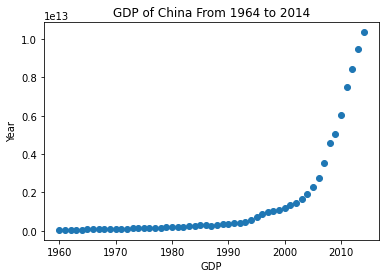

In [6]:
plt.scatter(df.Year, df.Value)
plt.xlabel('GDP')
plt.ylabel('Year')
plt.title('GDP of China From 1964 to 2014')
plt.show()

###**Choosing a Model**
From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

In [7]:
def sigmoid(x_data, beta1, beta2):
  y = 1 / (1 + np.exp(-beta1 * (x_data - beta2)))
  return y

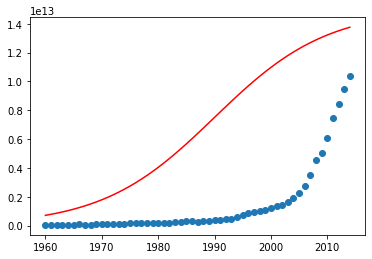

In [22]:
beta_1 = 0.10
beta_2 = 1990.0

X_data, y_data = (df['Year'].values, df['Value'].values)
predicted_y = sigmoid(X_data, beta_1, beta_2)

plt.scatter(X_data, y_data)
plt.plot(X_data, predicted_y*15000000000000, color='red')
plt.show()

###**How we find the best parameters for our fit line?**

We have tried to fit our sigmoid function to the data but it seems that we could not find a good parameters value for our data. 

We can use __curve_fit()__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of $sigmoid(xdata, *popt) - ydata$ is minimized.

_**popt**_ are our optimized parameters.

In [44]:
from scipy.optimize import curve_fit

#Normalizing Data
X_data = X_data/max(X_data)
y_data = y_data/max(y_data)

X_data
popt, pcov = curve_fit(sigmoid, X_data, y_data)
print("Beta 1 = %f\nBeta 2 = %f" % (popt[0], popt[1]))

Beta 1 = 690.453017
Beta 2 = 0.997207


array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

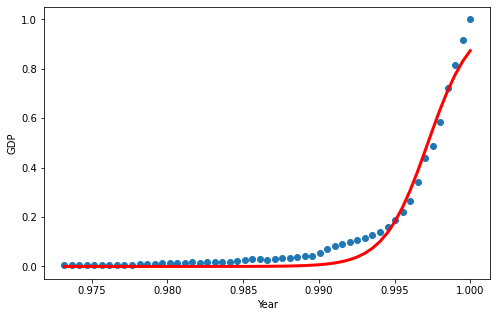

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(X_data, y_data)
plt.plot(X_data, sigmoid(X_data, *popt), color='red', linewidth=3)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

###**Calculating The Accuracy of the Model**

In [60]:
mask = np.random.rand(len(df)) < 0.8
train_set = df[mask]
test_set = df[~mask]

train_X, train_y = (train_set['Year'].values/max(train_set['Year']), train_set['Value'].values/max(train_set['Value']))
test_X, test_y = (test_set['Year']/max(train_set['Year']), test_set['Value']/max(train_set['Value']))

print("Size of Training Data: ", train_set.shape[0])
print("Size of Testing Data: ", test_set.shape[0])

popt, pcov = curve_fit(sigmoid, train_X, train_y)
print("Beta 1: %f\nBeta 2: %f" % (popt[0], popt[1]))

Size of Training Data:  44
Size of Testing Data:  11
Beta 1: 712.182762
Beta 2: 0.997059


In [61]:
from sklearn.metrics import r2_score

predicted_y = sigmoid(test_X, *popt)
print("Residual Sum of Squares / Mean Squared Error (MSE): %f" % np.mean((predicted_y - test_y) ** 2))
print("R2 Score: %f" % r2_score(predicted_y, test_y))

Residual Sum of Squares / Mean Squared Error (MSE): 0.002183
R2 Score: 0.962633


##**<center>Thank You For Your Patience</center>**